In [1]:
import pandas as pd
import datetime
import numpy as np


In [2]:
t_ds = pd.read_csv('1950-2021_actual_tornadoes.csv')
t_ds['date'] = pd.to_datetime(t_ds['date'])
t_ds

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,620523,2021,9,8,2021-09-08,15:32:00,3,PA,42,0,...,0.73,30,1,1,1,109,0,0,0,0
67554,620524,2021,9,8,2021-09-08,15:35:00,3,PA,42,0,...,1.45,30,1,1,1,109,0,0,0,0
67555,620525,2021,9,8,2021-09-08,19:08:00,3,FL,12,0,...,1.45,50,1,1,1,129,0,0,0,0
67556,620526,2021,9,9,2021-09-09,02:10:00,3,CT,9,0,...,0.75,75,1,1,1,13,0,0,0,0


In [3]:
# Filter dataset for Illinois

il_ds = t_ds[t_ds['st'] == 'IL']

# Create column with year and month

il_ds['Date'] = il_ds['date'].dt.to_period('M')

# Aggregate monthly tornado counts

monthly_t = il_ds.groupby('Date').size().reset_index(name = 'tornado_count')

/tmp/ipykernel_3767/1777235511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il_ds['Date'] = il_ds['date'].dt.to_period('M')


In [4]:
monthly_t

,Date,tornado_count
0,1950-01,2
1,1950-03,1
2,1950-06,1
3,1950-07,1
4,1950-12,3
...,...,...
440,2021-06,15
441,2021-07,8
442,2021-08,16
443,2021-10,10


In [ ]:
# Prepare index for merging

monthly_t['Date'] = monthly_t['Date'].dt.to_timestamp(how='start')
monthly_t = monthly_t.set_index('Date')

In [ ]:
# Read in features to be used
enso = pd.read_csv('https://www.atmos.illinois.edu/~snesbitt/soi.dat',sep=r'\s+',header=None,skiprows=4,skipfooter=0, engine='python')
pdo = pd.read_csv('https://www.ncei.noaa.gov/pub/data/cmb/ersst/v5/index/ersst.v5.pdo.dat',sep=r'\s+',header=None,skiprows=2, engine='python')
nao = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table',sep=r'\s+',header=None,skiprows=1, engine='python')
ao = pd.read_csv('https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii.table',sep=r'\s+',header=None,skiprows=1, engine='python')

In [7]:
enso_new=pd.DataFrame()
enso_new['Date']=pd.date_range(start=datetime.datetime(enso[0].iloc[0],1,1),end=datetime.datetime(enso[0].iloc[-1],12,1),freq="MS")

enso_new = enso_new.set_index('Date')
enso_new['ENSO']=enso.loc[:,1:].stack().values

In [8]:
nao_new=pd.DataFrame()
pdo_new=pd.DataFrame()
ao_new=pd.DataFrame()

nao_new['Date'] = pd.date_range(start=datetime.datetime(nao[0].iloc[0],1,1),end=datetime.datetime(nao[0].iloc[-1],12,1),freq="MS")
pdo_new['Date'] = pd.date_range(start=datetime.datetime(pdo[0].iloc[0],1,1),end=datetime.datetime(pdo[0].iloc[-1],12,1),freq="MS")
ao_new['Date'] = pd.date_range(start=datetime.datetime(ao[0].iloc[0],1,1),end=datetime.datetime(ao[0].iloc[-1],12,1),freq="MS")

nao_new = nao_new.set_index('Date')
pdo_new = pdo_new.set_index('Date')
ao_new = ao_new.set_index('Date')

nao_new['NAO']=nao.loc[:,1:].stack(dropna=False).values
pdo_new['PDO']=pdo.loc[:,1:].stack(dropna=False).values
ao_new['AO']=ao.loc[:,1:].stack(dropna=False).values

/tmp/ipykernel_3767/1740848809.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  nao_new['NAO']=nao.loc[:,1:].stack(dropna=False).values
/tmp/ipykernel_3767/1740848809.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pdo_new['PDO']=pdo.loc[:,1:].stack(dropna=False).values
/tmp/ipykernel_3767/1740848809.py:15: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  

In [9]:
# Merge all dataframes

merged_df = monthly_t.merge(enso_new, on='Date', how='outer') \
               .merge(nao_new, on='Date', how='outer') \
               .merge(pdo_new, on='Date', how='outer') \
               .merge(ao_new, on='Date', how='outer')

In [11]:
merged_df

,tornado_count,ENSO,NAO,PDO,AO
Date,,,,,
1854-01-01,NaN,NaN,NaN,0.11,NaN
1854-02-01,NaN,NaN,NaN,-0.24,NaN
1854-03-01,NaN,NaN,NaN,-0.40,NaN
1854-04-01,NaN,NaN,NaN,-0.44,NaN
1854-05-01,NaN,NaN,NaN,-0.54,NaN
...,...,...,...,...,...
2025-08-01,NaN,0.4,0.26,-3.20,0.036
2025-09-01,NaN,0.0,-0.80,-2.33,0.048
2025-10-01,NaN,-99.9,-0.96,-2.40,0.064


Create a random forest regression model and use features that include the 4 climate indices to predict the monthly number of tornadoes.  Create a scatter plot of the predicted and observed number of tornadoes over these states.  Report the correlation coefficient and RMSE of your model.

Correlation coefficient: 0.9775279837986706
RMSE: 3.3306796712874194


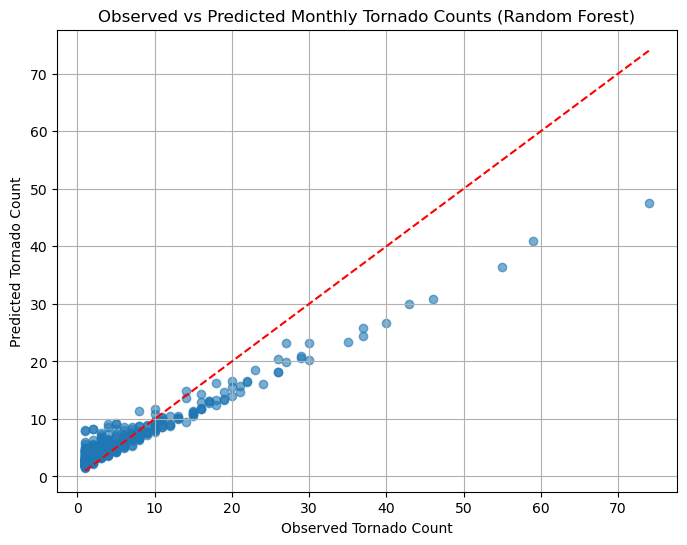

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Drop NAs from dataframe
merged_clean = merged_df.dropna()

# Select features and target
X = merged_clean[["ENSO", "NAO", "PDO", "AO"]]
y = merged_clean["tornado_count"]

# Create Random Forest
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
)
model.fit(X, y)

# Predict tornado counts
y_pred = model.predict(X)

# Correlation and RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
corr, _ = pearsonr(y, y_pred)

print("Correlation coefficient:", corr)
print("RMSE:", rmse)


#Scatter plot: Observed vs Predicted

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6)
plt.xlabel("Observed Tornado Count")
plt.ylabel("Predicted Tornado Count")
plt.title("Observed vs Predicted Monthly Tornado Counts (Random Forest)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.grid(True)
plt.show()


Create a one-hot encoding for the month of the year.  Repeat the scatterplot and compare the RMSE and correlation coefficient values.


=== Model With Month One-Hot Encoding ===
Correlation coefficient: 0.9623520360165355
RMSE: 3.2488509479226932


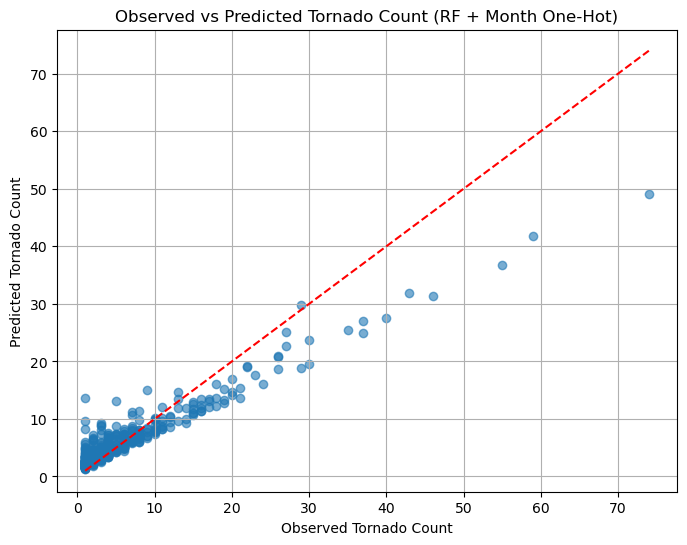

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Extract month as a feature
merged_df = merged_clean.copy()
merged_df["month"] = merged_df.index.month

# One-hot encode month
encoder = OneHotEncoder(drop="first", sparse_output=False)  # drop first to avoid collinearity
month_ohe = encoder.fit_transform(merged_df[["month"]])
month_labels = encoder.get_feature_names_out(["month"])

# Create final feature matrix
X2 = pd.concat(
    [
        merged_df[["ENSO", "NAO", "PDO", "AO"]].reset_index(drop=True),
        pd.DataFrame(month_ohe, columns=month_labels)
    ],
    axis=1
)

y2 = merged_df["tornado_count"].reset_index(drop=True)


# Train Random Forest

model_ohe = RandomForestRegressor(
    n_estimators=500,
    random_state=42
)
model_ohe.fit(X2, y2)

# Predict

y_pred_ohe = model_ohe.predict(X2)

# Correlation and RMSE
rmse_ohe = np.sqrt(mean_squared_error(y2, y_pred_ohe))
corr_ohe, _ = pearsonr(y2, y_pred_ohe)

print("\n=== Model With Month One-Hot Encoding ===")
print("Correlation coefficient:", corr_ohe)
print("RMSE:", rmse_ohe)

# Scatter Plot

plt.figure(figsize=(8,6))
plt.scatter(y2, y_pred_ohe, alpha=0.6)
plt.xlabel("Observed Tornado Count")
plt.ylabel("Predicted Tornado Count")
plt.title("Observed vs Predicted Tornado Count (RF + Month One-Hot)")
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--')
plt.grid(True)
plt.show()


Perform a feature importance and multipass permutation analysis of your features.

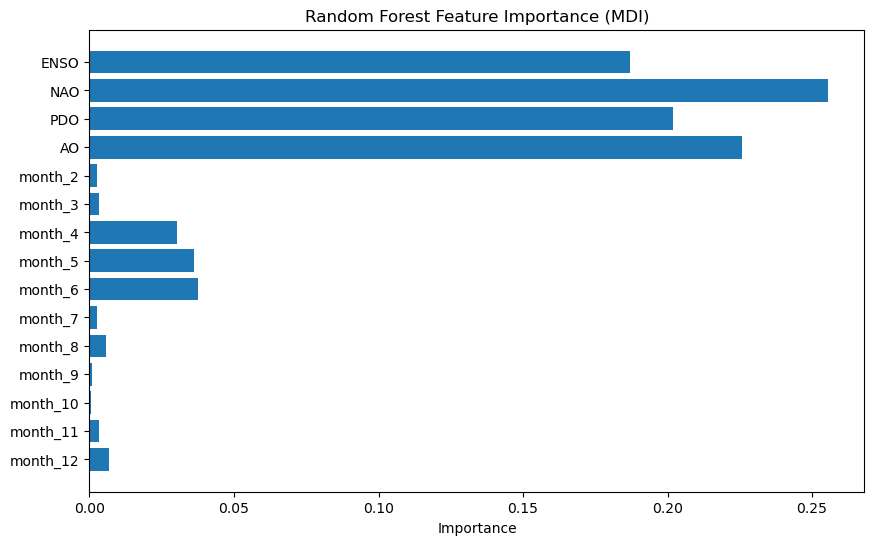


Random Forest Feature Importance:

NAO         0.255362
AO          0.225797
PDO         0.201783
ENSO        0.187048
month_6     0.037530
month_5     0.036333
month_4     0.030314
month_12    0.006700
month_8     0.005820
month_3     0.003366
month_11    0.003253
month_2     0.002620
month_7     0.002488
month_9     0.001008
month_10    0.000578
dtype: float64


In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Feature importance of model with one-hot encoding

importances = model_ohe.feature_importances_

# Plot
plt.figure(figsize=(10,6))
plt.barh(X2.columns, importances)
plt.title("Random Forest Feature Importance (MDI)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

# Print sorted importances
fi = pd.Series(importances, index=X2.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n")
print(fi)



Permutation Importance:

NAO         0.405904
month_5     0.389399
ENSO        0.334099
AO          0.327431
month_4     0.302483
month_6     0.283571
PDO         0.236940
month_12    0.024710
month_8     0.021168
month_11    0.005127
month_3     0.004794
month_2     0.004371
month_7     0.003473
month_9     0.001062
month_10    0.000345
dtype: float64


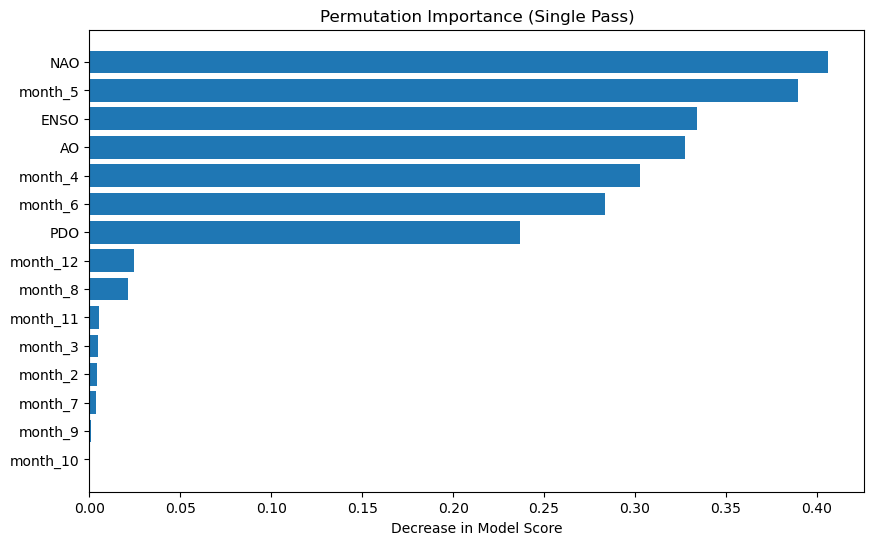

In [13]:
# Permutation Importance (single pass)

perm = permutation_importance(
    model_ohe, X2, y2, n_repeats=20, random_state=42
)

perm_importances = pd.Series(perm.importances_mean, index=X2.columns)\
     .sort_values(ascending=False)

print("\nPermutation Importance:\n")
print(perm_importances)

# Plot
plt.figure(figsize=(10,6))
plt.barh(perm_importances.index, perm_importances.values)
plt.title("Permutation Importance (Single Pass)")
plt.xlabel("Decrease in Model Score")
plt.gca().invert_yaxis()
plt.show()


Perform a feature importance and multipass permutation analysis of your features.

In [15]:
def multipass_permutation_ranking(X, y, n_repeats=20):
    remaining_features = list(X.columns)
    ranking = []

    while remaining_features:
        # Train model on remaining features
        model = RandomForestRegressor(n_estimators=500, random_state=42)
        model.fit(X[remaining_features], y)

        # Permutation importance among remaining
        perm = permutation_importance(
            model, X[remaining_features], y,
            n_repeats=n_repeats, random_state=42
        )

        perm_scores = pd.Series(
            perm.importances_mean,
            index=remaining_features
        )

        # Identify most important feature
        top_feature = perm_scores.idxmax()
        ranking.append(top_feature)

        print(f"Removed {top_feature} (importance={perm_scores[top_feature]:.4f})")

        # Remove feature for next iteration
        remaining_features.remove(top_feature)

    return ranking


# Run multipass ranking
ranking = multipass_permutation_ranking(X, y, n_repeats=20)

print("\n=== Multipass Permutation Ranking ===")
for i, f in enumerate(ranking, 1):
    print(f"{i}. {f}")


Removed NAO (importance=0.6005)
Removed AO (importance=0.6080)
Removed PDO (importance=1.0518)
Removed ENSO (importance=0.1551)

=== Multipass Permutation Ranking ===
1. NAO
2. AO
3. PDO
4. ENSO


Create a SHAP Summary Plot showing feature importance and feature effects.

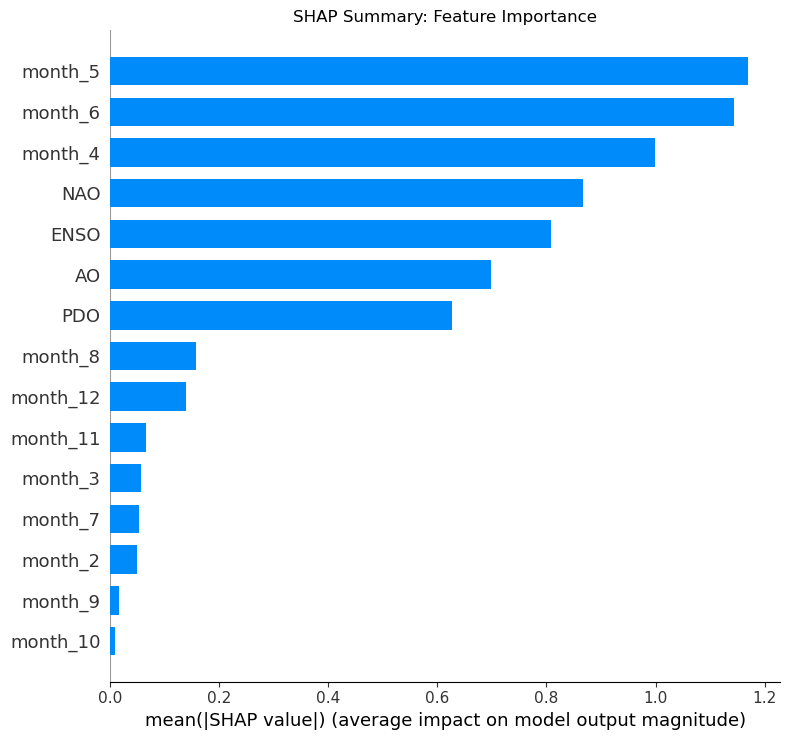

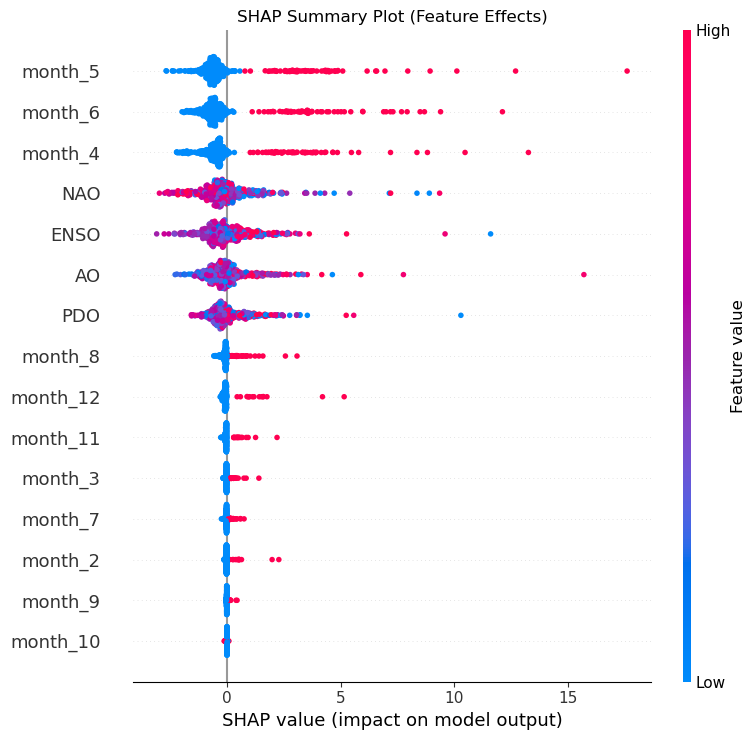

In [16]:
import shap
import matplotlib.pyplot as plt

# SHAP TreeExplainer for Random Forests
explainer = shap.TreeExplainer(model_ohe)
shap_values = explainer.shap_values(X2)

# SHAP Summary Bar Plot (global feature importance)
plt.title("SHAP Summary: Feature Importance")
shap.summary_plot(shap_values, X2, plot_type="bar")
plt.show()


# SHAP Beeswarm Summary Plot (importance + direction)
plt.title("SHAP Summary Plot (Feature Effects)")
shap.summary_plot(shap_values, X2)
plt.show()


Create a SHAP Feature Dependence for the ENSO index.

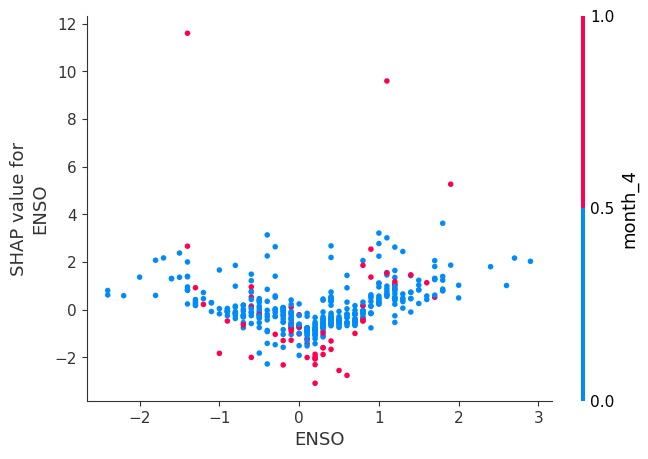

In [ ]:
import shap
import matplotlib.pyplot as plt


# Create SHAP dependence plot for ENSO
shap.dependence_plot(
    "ENSO",          
    shap_values,     
    X2              
)
